<a href="https://colab.research.google.com/github/ghostfm3/ksks/blob/master/%E8%A1%8C%E5%88%97andPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null
!echo mecab-config --dicdir"/mecab-ipadic-neologd"

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.
mecab-config --dicdir/mecab-ipadic-neologd


In [2]:
pip install unidic-lite

     |████████████████████████████████| 47.4MB 95kB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-cp37-none-any.whl size=47658825 sha256=d3c03352adb99c39798b88f9943062f159ea5bdbe1fd3da6786cf1168910cd9d
  Stored in directory: /root/.cache/pip/wheels/20/48/8d/b66d8361a27f58f41ec86640e4fd2640de0403a6367511eab7
Successfully built unidic-lite


In [3]:
import sys
sys.path.append('..')
import numpy as np
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [4]:
from google.colab import files
uploaded = files.upload()

Saving 蜜柑_mecab.txt to 蜜柑_mecab.txt


In [5]:
import MeCab
import codecs
text1 = codecs.open('蜜柑_mecab.txt', 'r', 'utf-8', "ignore").read().splitlines()


result = ''.join(text1)
text = result

corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)

[  0   1   2 ...   7   8 615]
{0: '或', 1: '曇っ', 2: 'た', 3: '冬', 4: 'の', 5: '日暮', 6: 'で', 7: 'ある', 8: '。', 9: '私', 10: 'は', 11: '横須賀', 12: '発', 13: '上り', 14: '二', 15: '等', 16: '客車', 17: '隅', 18: 'に', 19: '腰', 20: 'を', 21: '下し', 22: 'て', 23: '、', 24: 'ぼんやり', 25: '発車', 26: '笛', 27: '待っ', 28: 'い', 29: 'とう', 30: '電燈', 31: 'つい', 32: '中', 33: '珍らしく', 34: '外', 35: '一人', 36: 'も', 37: '乗客', 38: 'なかっ', 39: '覗く', 40: 'と', 41: 'うす暗い', 42: 'プラットフォオム', 43: '今日', 44: '珍しく', 45: '見送り', 46: '人影', 47: 'さえ', 48: '跡', 49: '絶っ', 50: '唯', 51: '檻', 52: '入れ', 53: 'られ', 54: '小犬', 55: 'が', 56: '一', 57: '匹', 58: '時々', 59: '悲し', 60: 'そう', 61: '吠え立て', 62: 'これ', 63: 'ら', 64: 'その', 65: '時', 66: '心もち', 67: '不思議', 68: 'な', 69: '位', 70: '似つかわしい', 71: '景色', 72: 'だっ', 73: '頭', 74: '云い', 75: 'よう', 76: 'ない', 77: '疲労', 78: '倦怠', 79: 'まるで', 80: '雪曇り', 81: '空', 82: 'どんより', 83: 'し', 84: '影', 85: '落し', 86: '外套', 87: 'ポッケット', 88: 'へ', 89: 'じっと', 90: '両手', 91: 'つっこん', 92: 'だ', 93: 'まま', 94: 'そこ', 95: 'はいっ', 96: 'いる', 97: '夕刊', 98:

In [7]:
def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] +=1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] +=1
  
  return co_matrix

In [6]:
def cos_similarity(x, y, eps=1e-8):
  nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
  ny = y / (np.sqrt(np.sum(y ** 2)) + eps)

  return np.dot(nx, ny)

In [8]:
import sys
sys.path.append('..')
import numpy as np
import MeCab
import codecs

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] +=1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] +=1
  
  return co_matrix

def cos_similarity(x, y, eps=1e-8):
  nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
  ny = y / (np.sqrt(np.sum(y ** 2)) + eps)

  return np.dot(nx, ny)

text1 = codecs.open('蜜柑_mecab.txt', 'r', 'utf-8', "ignore").read().splitlines()


result = ''.join(text1)
text = result

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['見る']]
c1 = C[word_to_id['注視']]
print(cos_similarity(c0, c1))

0.49999999292893216


In [9]:
import sys
sys.path.append('..')
import numpy as np
import MeCab
import codecs

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word
  
def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] +=1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] +=1
  
  return co_matrix

def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
  if query not in word_to_id:
    print('%s is not found' % query)
    return

  print('\n[query]' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)
  
  count = 0
  for i in (-1 * similarity).argsort():
    if id_to_word[i] == query:
      continue
    print(' %s: %s' % (id_to_word[i], similarity[i]))

    count += 1
    if count >= top:
      return

text1 = codecs.open('蜜柑_mecab.txt', 'r', 'utf-8', "ignore").read().splitlines()


result = ''.join(text1)
text = result

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('ぼんやり', word_to_id, id_to_word, C, top=5)


[query]ぼんやり
 やがて: 0.9999999858578643
 唯: 0.6708203863852
 ながら: 0.6488856791904124
 まるで: 0.6123724295979006
 わざわざ: 0.5773502627501202


In [10]:
import sys
sys.path.append('..')
import numpy as np
import MeCab
import codecs

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] +=1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] +=1
  
  return co_matrix

def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
  if query not in word_to_id:
    print('%s is not found' % query)
    return

  print('\n[query]' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)
  
  count = 0
  for i in (-1 * similarity).argsort():
    if id_to_word[i] == query:
      continue
    print(' %s: %s' % (id_to_word[i], similarity[i]))

    count += 1
    if count >= top:
      return

text1 = codecs.open('蜜柑_mecab.txt', 'r', 'utf-8', "ignore").read().splitlines()


result = ''.join(text1)
text = result

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

print('covariance matrix')
print(C)

covariance matrix
[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
import numpy as np
import pandas as pd
import urllib.request 
import matplotlib.pyplot as plt
import sklearn    #機械学習のライブラリ
from sklearn.decomposition import PCA   #主成分分析器
from sklearn.preprocessing import StandardScaler
from IPython.display import display

In [12]:
display(C)

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [13]:
pca = PCA()
pca.fit(C)
# データを主成分空間に写像
pca_cor = pca.transform(C)

In [14]:
most_similar('ぼんやり', word_to_id, id_to_word, pca_cor, top=5)


[query]ぼんやり
 やがて: 0.9999999860834402
 唯: 0.5357239959131337
 とうとう: 0.5165839354711063
 せわしなく: 0.5165839354711061
 漸: 0.5165839354711061


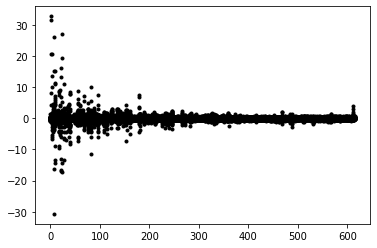

In [15]:
plt.plot(pca_cor, 'k.')